# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [76]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [77]:
#Type your code here
df = pd.read_csv('../fraud_raw.csv')

df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [78]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [79]:
df.isna().sum()

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64

### Checking Anomalies

In [80]:
df.describe()

,Income,Credit_card_number,Security_code,Fraud
count,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600
std,28837.72928,1.257950e+18,1484.424959,0.500022
min,1.00000,6.040296e+10,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000


### Checking whether the dataset is balanced

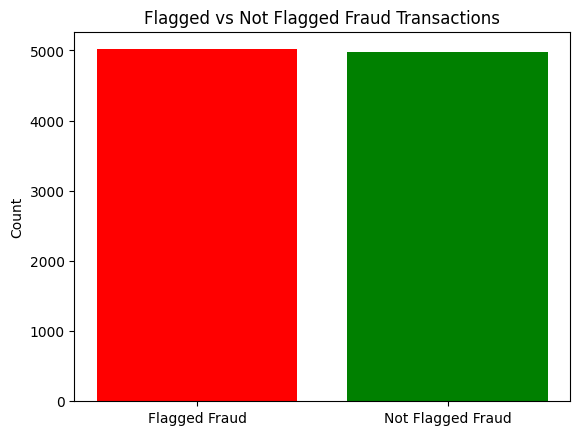

In [81]:
# Count the number of fraud and not fraud
fraud_count = len(df[df['Fraud'] == 1])
not_fraud_count = len(df[df['Fraud'] == 0])

# Plot
plt.bar(['Flagged Fraud', 'Not Flagged Fraud'], [fraud_count, not_fraud_count], color=['red', 'green'])
plt.title('Flagged vs Not Flagged Fraud Transactions')
plt.ylabel('Count')
plt.show()

In [82]:
print(f'Fraud: {fraud_count}')
print(f'Not Fraud: {not_fraud_count}')

Fraud: 5016
Not Fraud: 4984


### Checking duplicates

In [83]:
df.duplicated().sum()

np.int64(0)

### Categorical distribution

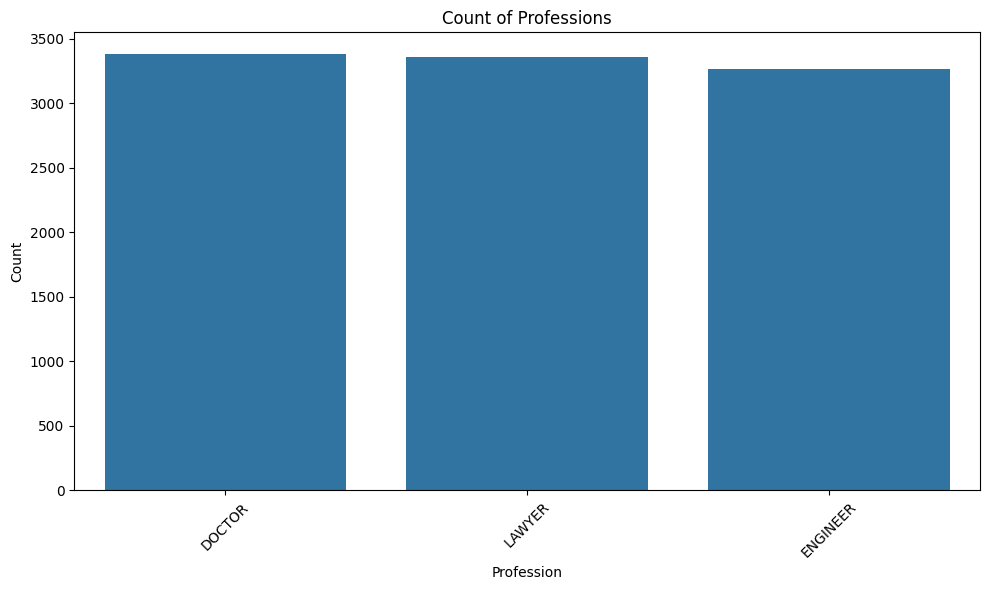

In [84]:
# Plot Profession counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', data=df, order=df['Profession'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Professions')
plt.ylabel('Count')
plt.xlabel('Profession')
plt.tight_layout()
plt.show()

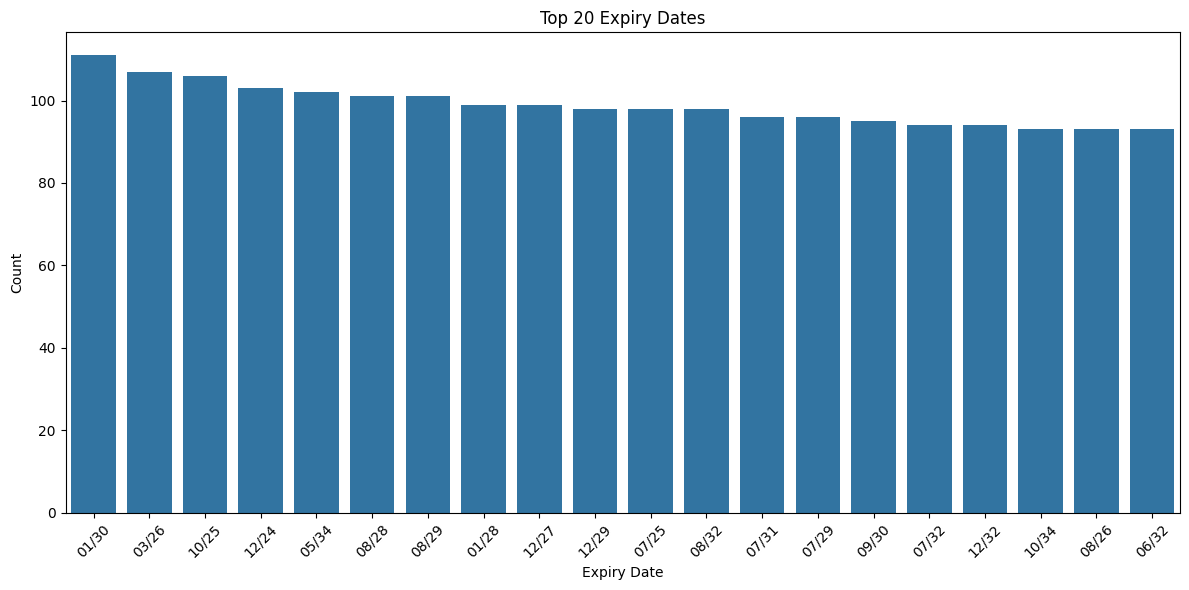

In [85]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Expiry', data=df, order=df['Expiry'].value_counts().index[:20])  # Show top 20
plt.xticks(rotation=45)
plt.title('Top 20 Expiry Dates')
plt.ylabel('Count')
plt.xlabel('Expiry Date')
plt.tight_layout()
plt.show()

### Numerical Distribution

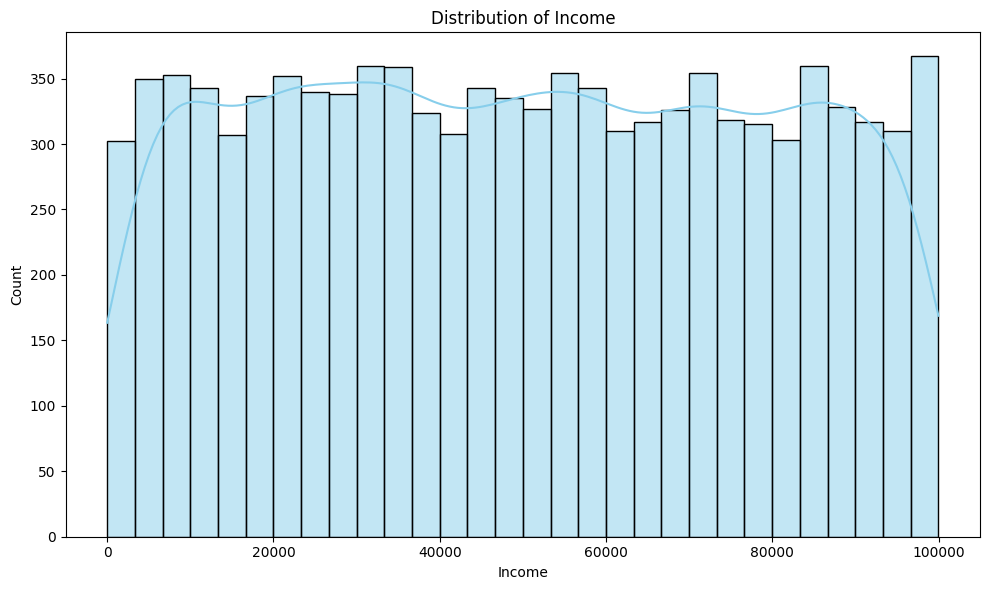

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Based on the all given results, we can the dataset is very neat since it is a generated dataset.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Feature Engineering

In [87]:
# Ensure ExpiredDate is datetime
# Add '20' prefix and set day as 1
df['Expiry'] = '01/' + df['Expiry']  # Now format is DD/MM/YY

# Parse with specified format
df['Expiry'] = pd.to_datetime(df['Expiry'], format='%d/%m/%y', errors='coerce')

# Define the reference date (e.g., today)
today = pd.Timestamp.today()

# Calculate days remaining
df['DaysToExpire'] = (df['Expiry'] - today).dt.days

In [88]:
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,DaysToExpire
0,DOCTOR,42509,3515418493460774,2025-07-01,251,1,32
1,DOCTOR,80334,213134223583196,2032-05-01,858,1,2528
2,LAWYER,91552,4869615013764888,2030-03-01,755,1,1736
3,LAWYER,43623,341063356109385,2029-01-01,160,1,1312
4,DOCTOR,22962,4707418777543978402,2030-11-01,102,0,1981


### One-hot Encoding

In [ ]:
prof_data = df[['Profession']]

# Create encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded_array = encoder.fit_transform(prof_data)

# Get new column names
encoded_cols = encoder.get_feature_names_out(['Profession'])

# Create DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Concatenate with original df (excluding original 'Profession')
df_encoded = pd.concat([df.drop(columns=['Profession']), encoded_df], axis=1)


In [90]:
df_encoded.head()

,Income,Credit_card_number,Expiry,Security_code,Fraud,DaysToExpire,Profession_ENGINEER,Profession_LAWYER
0,42509,3515418493460774,2025-07-01,251,1,32,0.0,0.0
1,80334,213134223583196,2032-05-01,858,1,2528,0.0,0.0
2,91552,4869615013764888,2030-03-01,755,1,1736,0.0,1.0
3,43623,341063356109385,2029-01-01,160,1,1312,0.0,1.0
4,22962,4707418777543978402,2030-11-01,102,0,1981,0.0,0.0


### Standarization

In [91]:
scaler = StandardScaler()

# Select columns to standardize
data_to_scale = df_encoded[['Income', 'DaysToExpire']]

# Fit scaler and transform data
scaled_data = scaler.fit_transform(data_to_scale)

df_encoded[['Income', 'DaysToExpire']] = scaled_data

In [92]:
df_encoded.head()

,Income,Credit_card_number,Expiry,Security_code,Fraud,DaysToExpire,Profession_ENGINEER,Profession_LAWYER
0,-0.251496,3515418493460774,2025-07-01,251,1,-1.486750,0.0,0.0
1,1.060219,213134223583196,2032-05-01,858,1,0.885283,0.0,0.0
2,1.449243,4869615013764888,2030-03-01,755,1,0.132619,0.0,1.0
3,-0.212864,341063356109385,2029-01-01,160,1,-0.270323,0.0,1.0
4,-0.929357,4707418777543978402,2030-11-01,102,0,0.365450,0.0,0.0


### Remove Unused Features

In [93]:
df_encoded = df_encoded.drop(columns=['Credit_card_number', 'Security_code', 'Expiry'])

In [94]:
df_encoded.head()

,Income,Fraud,DaysToExpire,Profession_ENGINEER,Profession_LAWYER
0,-0.251496,1,-1.486750,0.0,0.0
1,1.060219,1,0.885283,0.0,0.0
2,1.449243,1,0.132619,0.0,1.0
3,-0.212864,1,-0.270323,0.0,1.0
4,-0.929357,0,0.365450,0.0,0.0
